In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pylab import *

import warnings
warnings.filterwarnings('ignore')

from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import load_digits

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from matplotlib.patches import Rectangle

In [2]:
df = pd.read_csv('data/Accidents_categorical.csv')

In [106]:
df.head(6)

,Accident_Index,Latitude,Longitude,Region,Urban_or_Rural_Area,X1st_Road_Class,Driver_IMD_Decile,Speed_limit,Road_Type,Road_Surface_Conditions,...,Junction_Detail,Junction_Location,X1st_Point_of_Impact,Driver_Journey_Purpose,Engine_CC,Propulsion_Code,Vehicle_Make,Vehicle_Category,Vehicle_Manoeuvre,Accident_Severity
0,201001BS70015,51.492045,-0.178376,London,Urban,A,2,30,Dual carriageway,Wet or damp,...,Crossroads,Mid Junction - on roundabout or on main road,Front,Other/Not known,1896,Heavy oil,Volkswagen,Taxi,Going ahead,Slight
1,201001BS70034,51.485058,-0.168572,London,Urban,B,8,30,Single carriageway,Dry,...,T or staggered junction,Mid Junction - on roundabout or on main road,Front,Other/Not known,599,Petrol,Honda,Motorcycle,Going ahead,Slight
2,201001BS70040,51.495653,-0.179097,London,Urban,C,7,30,Single carriageway,Dry,...,Not at junction or within 20 metres,Not at or within 20 metres of junction,Front,Other/Not known,1781,Petrol,Audi,Car,Going ahead,Slight
3,201001BS70045,51.494743,-0.195845,London,Urban,A,7,30,Single carriageway,Wet or damp,...,Not at junction or within 20 metres,Not at or within 20 metres of junction,Offside,Other/Not known,649,Petrol,Other,Motorcycle,Moving off,Slight
4,201001BS70060,51.514170,-0.207760,London,Urban,B,5,30,Single carriageway,Wet or damp,...,Crossroads,Mid Junction - on roundabout or on main road,Front,Other/Not known,600,Petrol,Suzuki,Motorcycle,Going ahead,Slight
5,201001BS70065,51.499635,-0.209915,London,Urban,A,3,30,Single carriageway,Dry,...,More than 4 arms (not roundabout),Mid Junction - on roundabout or on main road,Offside,Other/Not known,2987,Heavy oil,Mercedes,Car,Waiting to go,Slight


## Разведочный анализ данных

In [82]:
# Обозрим размер выборки
df.shape

(251832, 33)

In [83]:
# Выведем информацию о выборке. 
# Мы видим категориальные признаки, и констатируем, что нам нужно будет их трансформировать(закодировать).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251832 entries, 0 to 251831
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Accident_Index           251832 non-null  object 
 1   Latitude                 251832 non-null  float64
 2   Longitude                251832 non-null  float64
 3   Region                   251832 non-null  object 
 4   Urban_or_Rural_Area      251832 non-null  object 
 5   X1st_Road_Class          251832 non-null  object 
 6   Driver_IMD_Decile        251832 non-null  int64  
 7   Speed_limit              251832 non-null  int64  
 8   Road_Type                251832 non-null  object 
 9   Road_Surface_Conditions  251832 non-null  object 
 10  Weather                  251832 non-null  object 
 11  High_Wind                251832 non-null  object 
 12  Lights                   251832 non-null  object 
 13  Datetime                 251832 non-null  object 
 14  Year

In [84]:
# Вычислим показатели описательной статистики
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,251832.0,52.341463,1.160963,49.915001,51.436612,52.131834,53.384119,58.893008
Longitude,251832.0,-1.178765,1.215054,-6.530040,-2.029776,-1.208209,-0.199958,1.758661
Driver_IMD_Decile,251832.0,5.470369,2.826487,1.000000,3.000000,5.000000,8.000000,10.000000
Speed_limit,251832.0,39.535921,14.182828,20.000000,30.000000,30.000000,50.000000,70.000000
Year,251832.0,2011.989104,1.411094,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000
Season,251832.0,2.460541,1.100914,1.000000,1.000000,2.000000,3.000000,4.000000
Month_of_Year,251832.0,6.554870,3.409881,1.000000,4.000000,7.000000,10.000000,12.000000
Day_of_Month,251832.0,15.638255,8.748529,1.000000,8.000000,16.000000,23.000000,31.000000
Day_of_Week,251832.0,3.916722,1.929438,1.000000,2.000000,4.000000,6.000000,7.000000
Hour_of_Day,251832.0,0.589514,0.207056,0.001000,0.434000,0.618000,0.742000,0.999000


In [85]:
# Проверим, есть ли пропуски. Пропусков нет
df.isnull().sum()

Accident_Index             0
Latitude                   0
Longitude                  0
Region                     0
Urban_or_Rural_Area        0
X1st_Road_Class            0
Driver_IMD_Decile          0
Speed_limit                0
Road_Type                  0
Road_Surface_Conditions    0
Weather                    0
High_Wind                  0
Lights                     0
Datetime                   0
Year                       0
Season                     0
Month_of_Year              0
Day_of_Month               0
Day_of_Week                0
Hour_of_Day                0
Number_of_Vehicles         0
Age_of_Driver              0
Age_of_Vehicle             0
Junction_Detail            0
Junction_Location          0
X1st_Point_of_Impact       0
Driver_Journey_Purpose     0
Engine_CC                  0
Propulsion_Code            0
Vehicle_Make               0
Vehicle_Category           0
Vehicle_Manoeuvre          0
Accident_Severity          0
dtype: int64

## Визуализация

### Pairplot

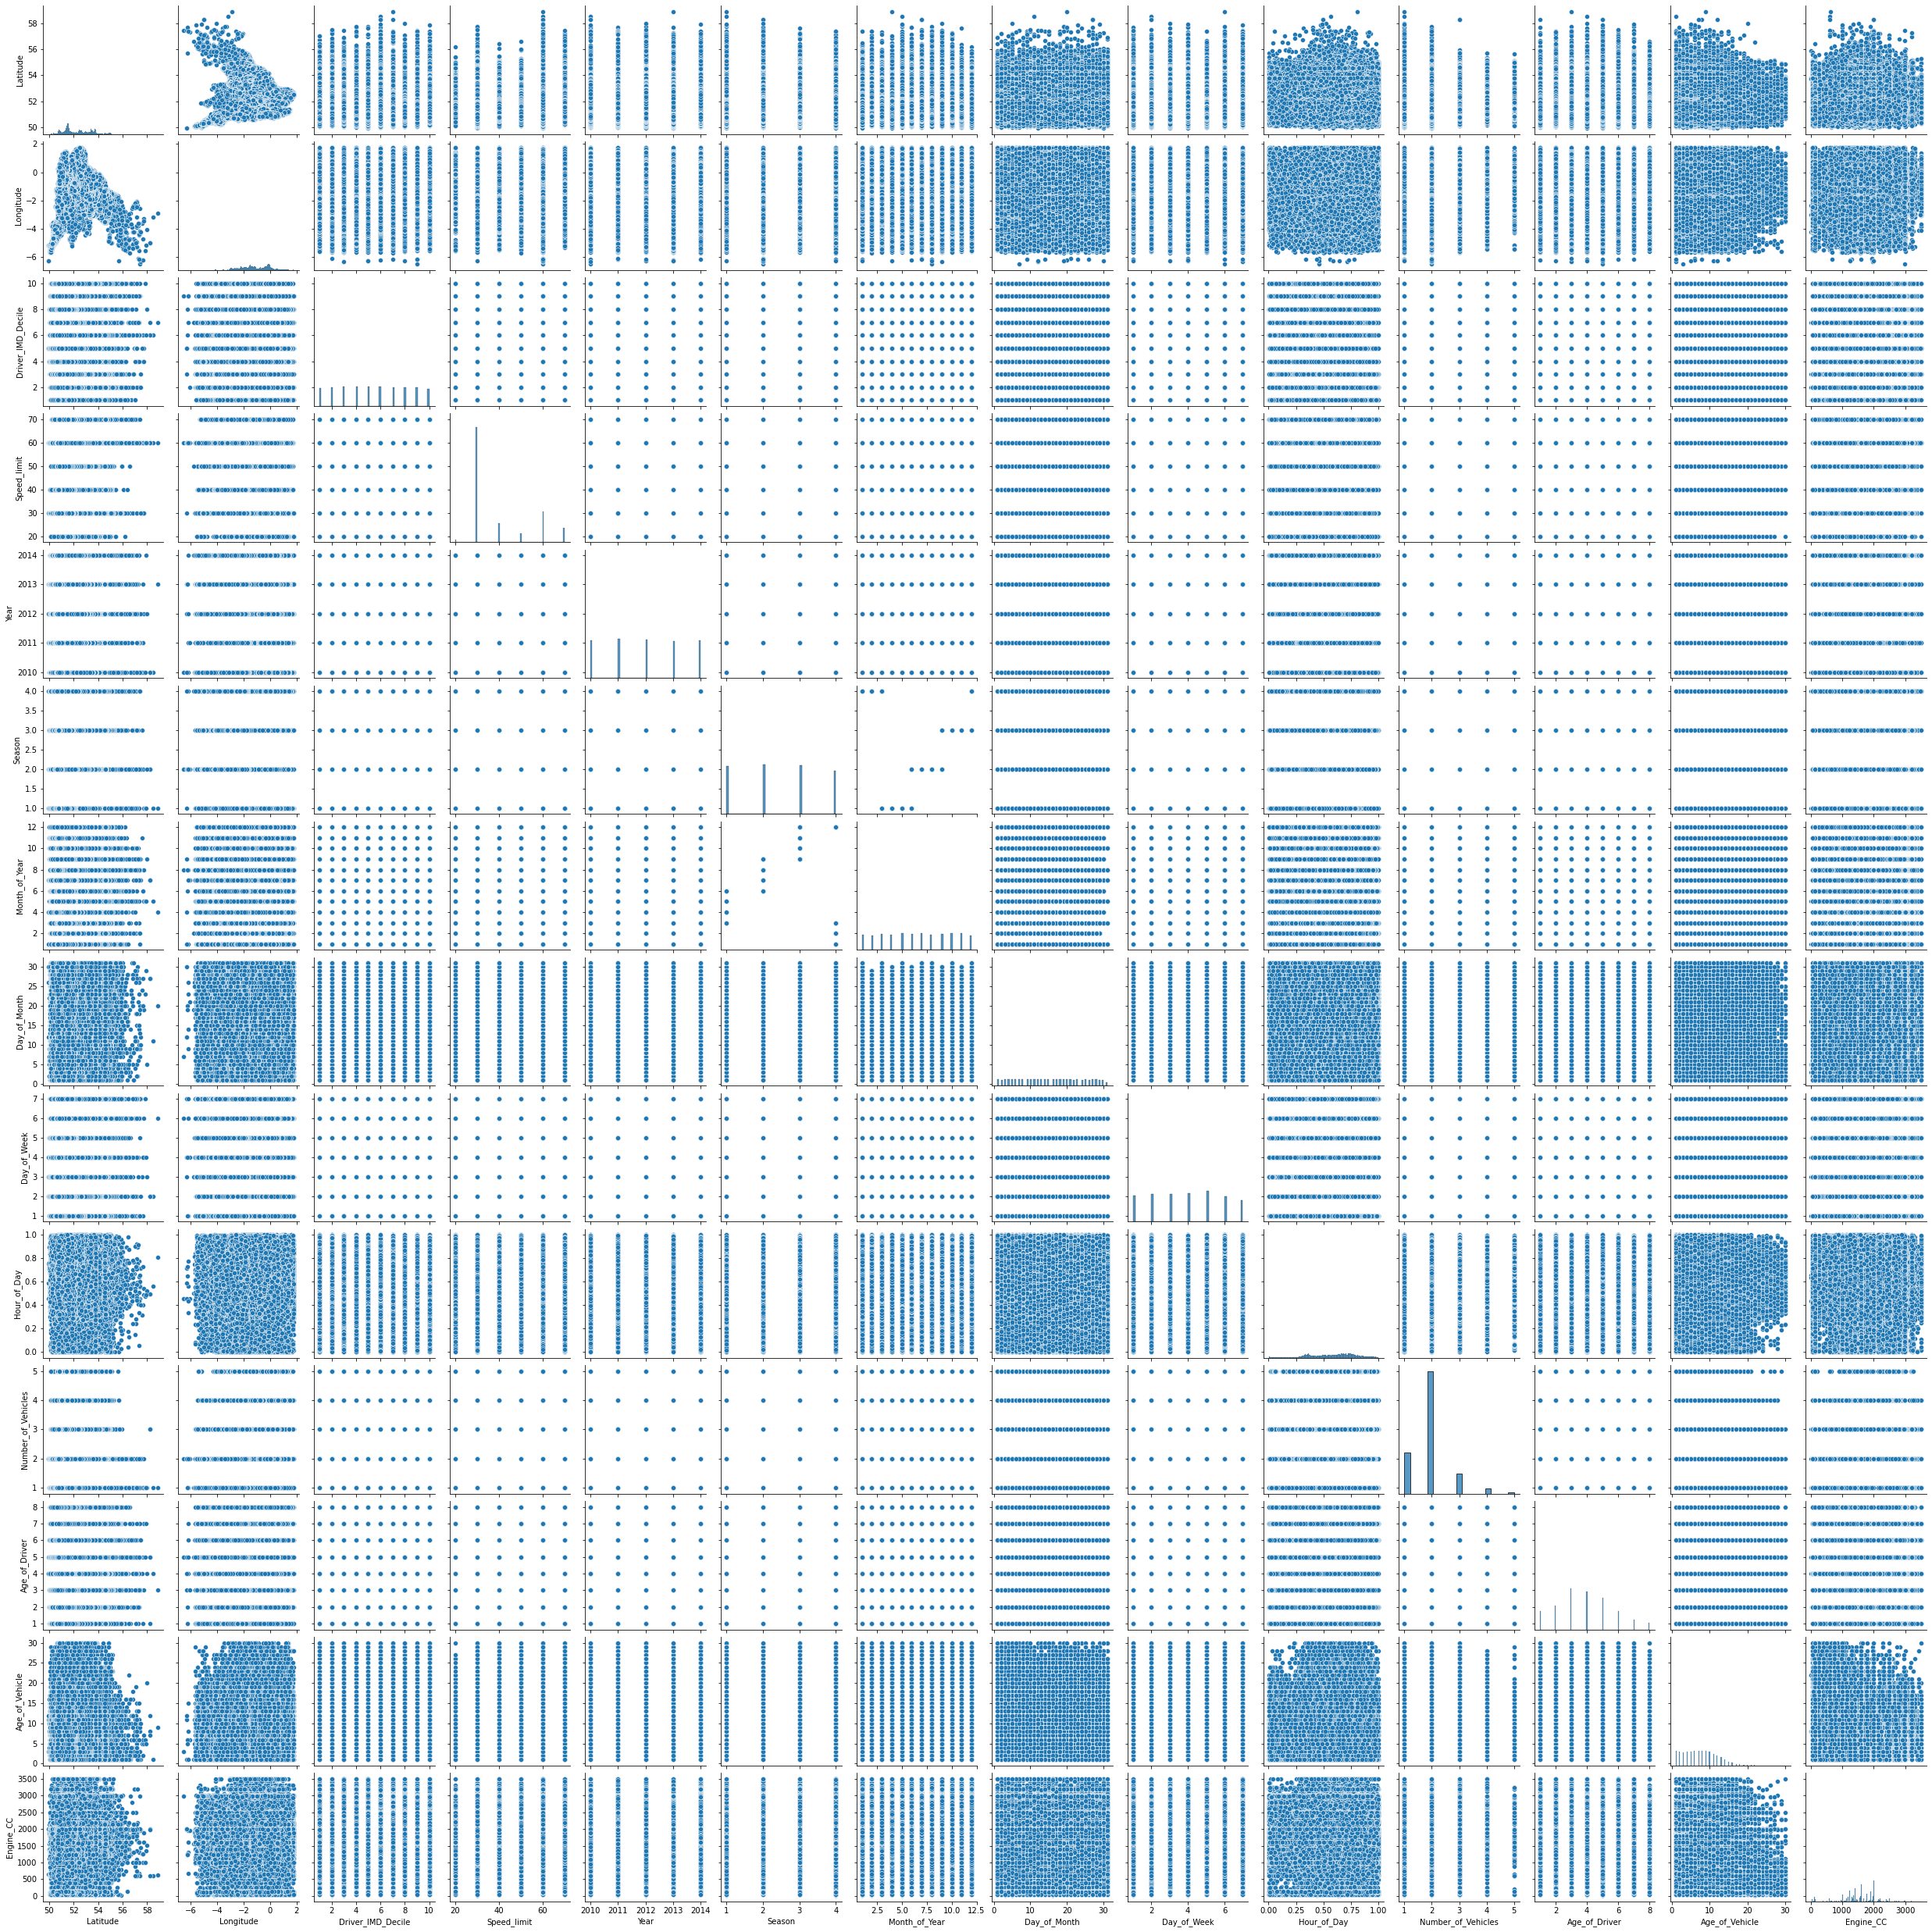

In [12]:
# Пострим pairplot 
sns.pairplot(df);

### Heatmap

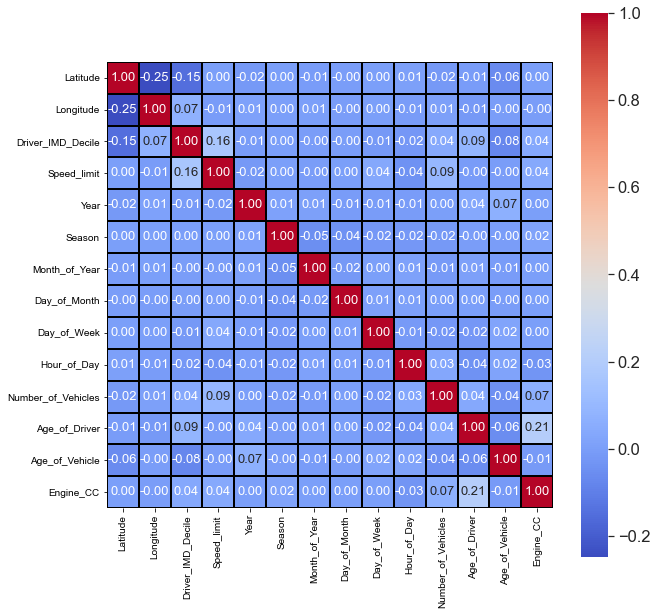

In [68]:
# Сформируем набор числовых данных и построим тепловую карту для визуализации корреляции между числовыми параметрами. 
# Значимой взаимной корреляции не наблюдаем.
cont_df = df.select_dtypes(include=["int64", "float64"])
plt.subplots(figsize=(10,10)) 
sns.set(font_scale=1.5) 
hm = sns.heatmap(cont_df.corr(), 
                 cbar=True,
                 annot=True,
                 annot_kws={'size': 13},
                 square=True,
                 fmt='.2f',
                 cmap="coolwarm",
                 linewidths=1,
                 linecolor='black')
plt.show()

In [87]:
max_col = cont_df.corr().applymap(lambda x: x if (x>=0.21) or (x<=-0.15) else 0)

In [88]:
max_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, Latitude to Engine_CC
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Latitude            14 non-null     float64
 1   Longitude           14 non-null     float64
 2   Driver_IMD_Decile   14 non-null     float64
 3   Speed_limit         14 non-null     float64
 4   Year                14 non-null     float64
 5   Season              14 non-null     float64
 6   Month_of_Year       14 non-null     float64
 7   Day_of_Month        14 non-null     float64
 8   Day_of_Week         14 non-null     float64
 9   Hour_of_Day         14 non-null     float64
 10  Number_of_Vehicles  14 non-null     float64
 11  Age_of_Driver       14 non-null     float64
 12  Age_of_Vehicle      14 non-null     float64
 13  Engine_CC           14 non-null     float64
dtypes: float64(14)
memory usage: 2.2+ KB


In [89]:
max_col.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,14.0,0.042980,0.285315,-0.248174,0.0,0.0,0.0,1.0
Longitude,14.0,0.053702,0.280277,-0.248174,0.0,0.0,0.0,1.0
Driver_IMD_Decile,14.0,0.060707,0.273290,-0.150103,0.0,0.0,0.0,1.0
Speed_limit,14.0,0.071429,0.267261,0.000000,0.0,0.0,0.0,1.0
Year,14.0,0.071429,0.267261,0.000000,0.0,0.0,0.0,1.0
Season,14.0,0.071429,0.267261,0.000000,0.0,0.0,0.0,1.0
Month_of_Year,14.0,0.071429,0.267261,0.000000,0.0,0.0,0.0,1.0
Day_of_Month,14.0,0.071429,0.267261,0.000000,0.0,0.0,0.0,1.0
Day_of_Week,14.0,0.071429,0.267261,0.000000,0.0,0.0,0.0,1.0
Hour_of_Day,14.0,0.071429,0.267261,0.000000,0.0,0.0,0.0,1.0


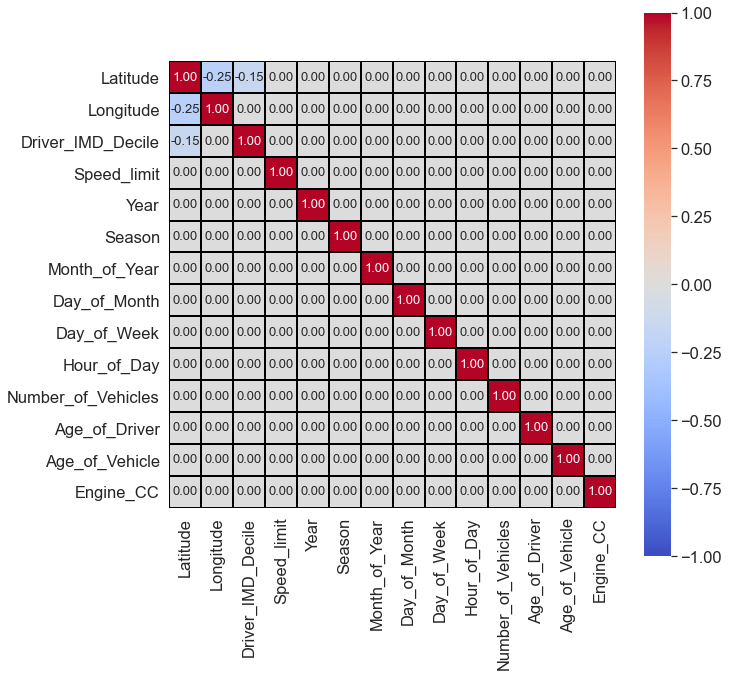

In [95]:
# Сформируем набор числовых данных и построим тепловую карту для визуализации корреляции между числовыми параметрами. 
# Значимой взаимной корреляции не наблюдаем.
plt.subplots(figsize=(10,10)) 
sns.set(font_scale=1.5) 
hm = sns.heatmap(max_col, 
                 cbar=True,
                 annot=True,
                 annot_kws={'size': 13},
                 square=True,
                 fmt='.2f',
                 cmap="coolwarm",
                 linewidths=1,
                 vmax=1.0,
                 vmin=-1.0,
                 linecolor='black')
plt.show()

### Гистограммы

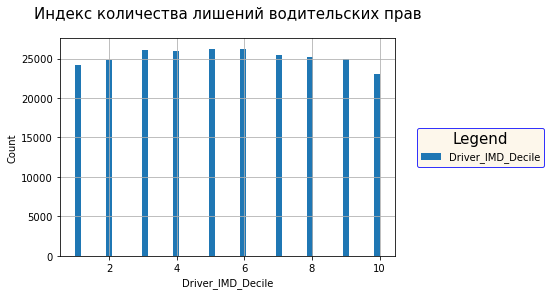

In [68]:
#Построим гистограммы hist для 2-х признаков с неким распределением значений
# 1) Driver_IMD_Decile - индекс количества лишений водительских прав (принимает значения от 1 до 10)
df["Driver_IMD_Decile"].hist(bins=50, label='Driver_IMD_Decile')

plt.xlabel('Driver_IMD_Decile'); 
plt.ylabel('Count'); 
plt.title('Индекс количества лишений водительских прав', pad = 20, fontsize = 15)
plt.legend(facecolor = 'oldlace', 
           edgecolor = 'b', 
           loc='center left', 
           bbox_to_anchor=(1.05, 0.5),
           title='Legend', 
           title_fontsize = '15')

Видим довольно гомогенное распределение. Фигуранты аварий неоднократно лишались водительских прав, однако количество лишений не играетбольшой роли.

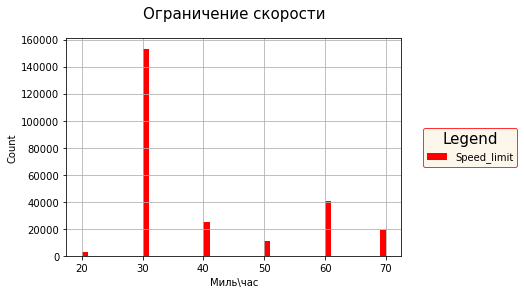

In [69]:
# 2) Speed_limit - ограничение скорости (принимает значения от 20 до 70)
df["Speed_limit"].hist(bins=50, color = 'red', label='Speed_limit')

plt.xlabel('Миль\час'); 
plt.ylabel('Count'); 
plt.title('Ограничение скорости', pad = 20, fontsize = 15)
plt.legend(facecolor = 'oldlace', 
           edgecolor = 'r', 
           loc='center left', 
           bbox_to_anchor=(1.05, 0.5),
           title='Legend', 
           title_fontsize = '15')

Для второго признака мы видим, что превалирует ограничение скорости 30 миль в час.

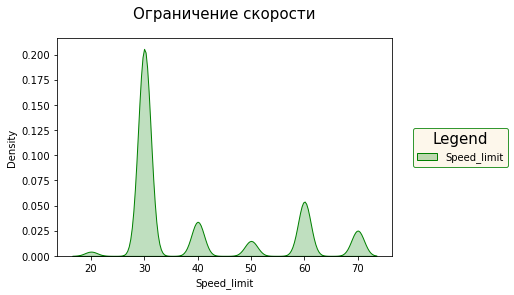

In [67]:
# Построим kdeplot для этих же 2-х признаков
# 1)
sns.kdeplot(data=df["Speed_limit"],shade=True,color='green', label='Speed_limit')
plt.title('Ограничение скорости', pad = 20, fontsize = 15)
plt.legend(facecolor = 'oldlace', 
           edgecolor = 'green', 
           loc='center left', 
           bbox_to_anchor=(1.05, 0.5),
           title='Legend', 
           title_fontsize = '15')

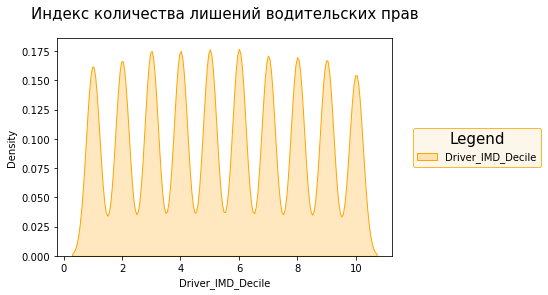

In [70]:
# 2)
sns.kdeplot(data=df["Driver_IMD_Decile"],shade=True,color='orange', label='Driver_IMD_Decile')
plt.title('Индекс количества лишений водительских прав', pad = 20, fontsize = 15)
plt.legend(facecolor = 'oldlace', 
           edgecolor = 'orange', 
           loc='center left', 
           bbox_to_anchor=(1.05, 0.5),
           title='Legend', 
           title_fontsize = '15')

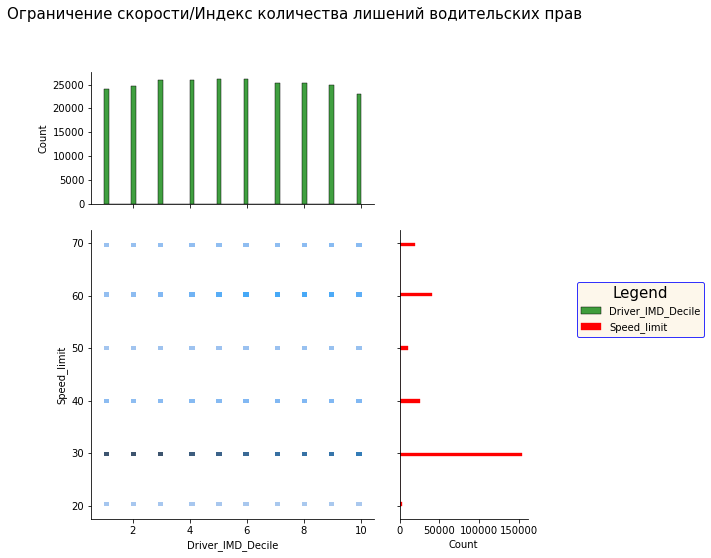

In [130]:
# Построим joinplot для этих же 2-х признаков
p=sns.jointplot(data=df, x="Driver_IMD_Decile", y="Speed_limit", kind='hist', height=7, ratio=2, marginal_ticks=True, marginal_kws={'color': 'green'})
p.fig.suptitle("Ограничение скорости/Индекс количества лишений водительских прав", y = 1.1,
             fontsize = 15)
p.x = df["Driver_IMD_Decile"]
p.y = df["Speed_limit"]
plt.setp(p.ax_marg_y.patches, color="r")
p.fig.legend(["Driver_IMD_Decile", "Speed_limit"], facecolor = 'oldlace', 
           edgecolor = 'blue', 
           loc='center left', 
           bbox_to_anchor=(1.05, 0.5),
           title='Legend', 
           title_fontsize = '15')

## Boxplot

Посмотрим, как влияет на нашу целевую переменную (Accident_Severity-серьезность несчастного случая)различные признаки с неким распределением значений:
1) Engine_CC - объем двигателя автомобиля, участвовавшего в ДТП
2) Driver_IMD_Decile - количество лишений водительских прав водителя, участвовавшего в ДТП
3) Speed_limit - скоростное ограничение в месте, где произошло ДТП

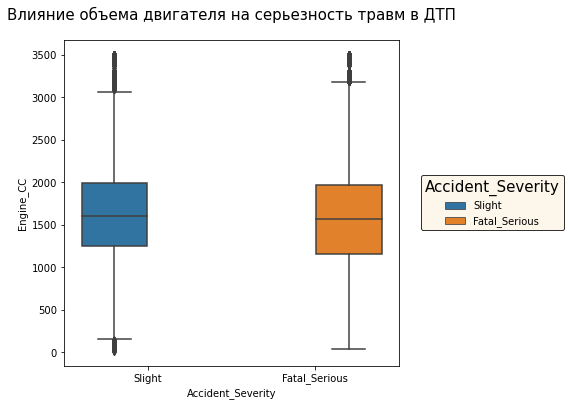

In [160]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Accident_Severity', y='Engine_CC', data=df, hue = 'Accident_Severity')
plt.title('Влияние объема двигателя на серьезность травм в ДТП', pad = 20, fontsize = 15)
fig.legend(facecolor = 'oldlace', 
           edgecolor = 'black', 
           loc='center left', 
           bbox_to_anchor=(1.05, 0.5),
           title='Accident_Severity', 
           title_fontsize = '15')

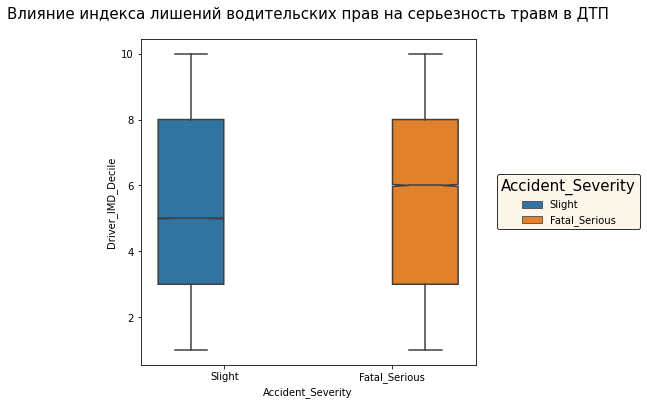

In [161]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Accident_Severity', y='Driver_IMD_Decile', data=df,  hue = 'Accident_Severity' , notch = True)
plt.title('Влияние индекса лишений водительских прав на серьезность травм в ДТП', pad = 20, fontsize = 15)
fig.legend(facecolor = 'oldlace', 
           edgecolor = 'black', 
           loc='center left', 
           bbox_to_anchor=(1.05, 0.5),
           title='Accident_Severity', 
           title_fontsize = '15')

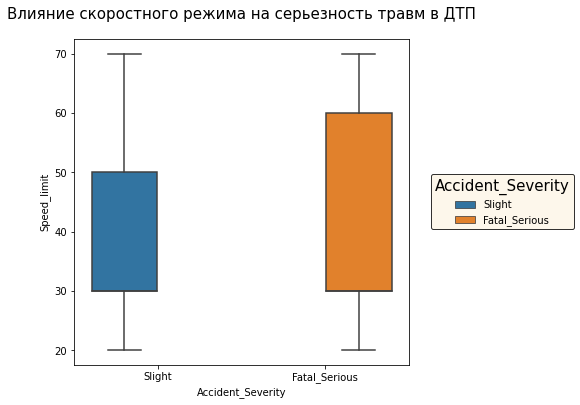

In [162]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Accident_Severity', y='Speed_limit', data=df,  hue = 'Accident_Severity')
plt.title('Влияние скоростного режима на серьезность травм в ДТП', pad = 20, fontsize = 15)
fig.legend(facecolor = 'oldlace', 
           edgecolor = 'black', 
           loc='center left', 
           bbox_to_anchor=(1.05, 0.5),
           title='Accident_Severity', 
           title_fontsize = '15')

Мы видим, что параметр "Объем двигателя" не сильно сказывается на серьезности аварии в основной статистике. Однако выбросы указывают на то, что владельцев мощных автомобилей хоть и гораздо меньше, но в аварии как фатальные, так и нет они попадают.
По количеству лишения прав медиана фатальных аварий смещена вверх, но в целом распределение равновесное.
А вот скоростной режим оказывает большее влияние. В диапазоне ограничения от 50 до 60 км\ч происходит больше аварий со смертельным исходом. Вероятно причина кроется в том, что скорость менее 50 км\ч не опасна для жизни, а на скорости больше 60 км\ч водитель более сконцентрированный и внимательный.

## Violinplot

Text(0.5, 1.0, 'Влияние времени года на серьезность травм в ДТП')

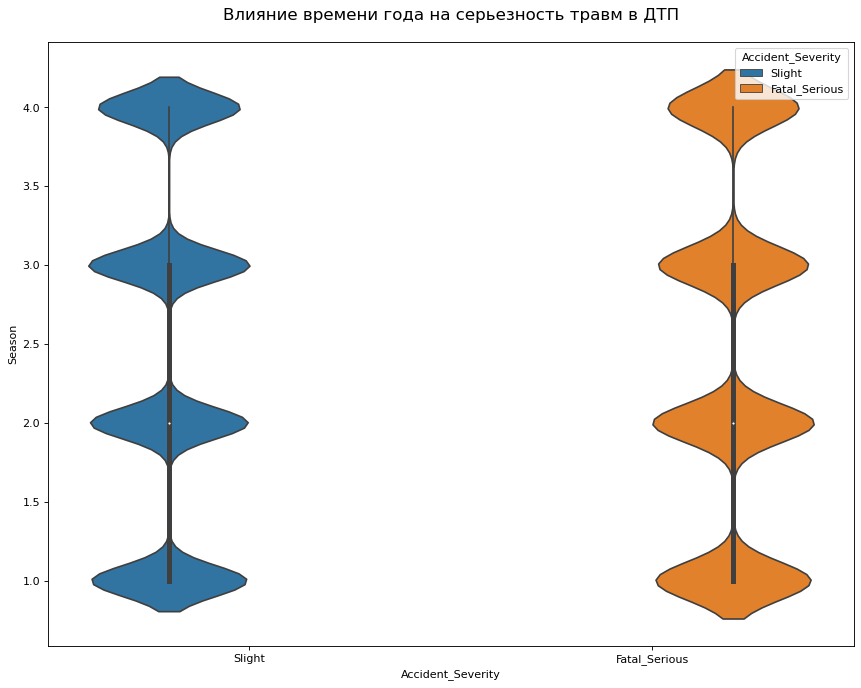

In [196]:
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='Accident_Severity', y='Season', data=df, hue='Accident_Severity', loc='center')
plt.title('Влияние времени года на серьезность травм в ДТП', pad = 20, fontsize = 15)

## Countplot

Text(0.5, 1.0, 'Влияние индекса лишений водительских прав на серьезность травм в ДТП')

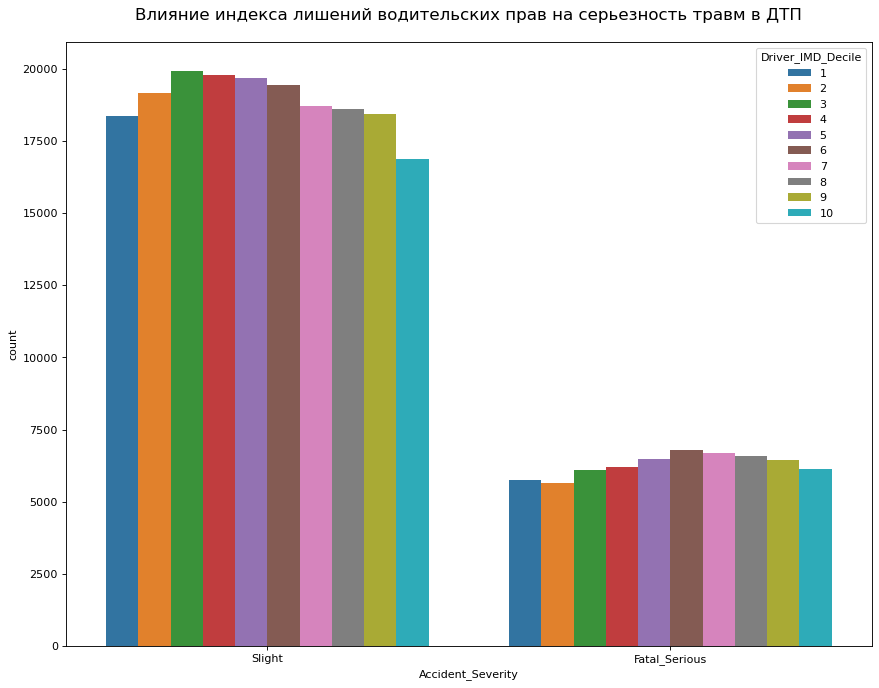

In [176]:
plt.figure(figsize=(13,10), dpi= 80)
sns.countplot(x = df['Accident_Severity'], hue = df['Driver_IMD_Decile'])
plt.title('Влияние индекса лишений водительских прав на серьезность травм в ДТП', pad = 20, fontsize = 15)

Рассмотрим еще раз влияние влияние индекса лишений водительских прав на серьезность травм в ДТП, на этот раз при помощи Countplot. Здесь мы также видим, что этот параметр не оказывает большое значение ня тяжесть ДТП. Но также мы видим, что "легких" авариях все же больше фигуриеут водителей с индексом 3-4-5, а в серьезных 6-7-8.

## Pie

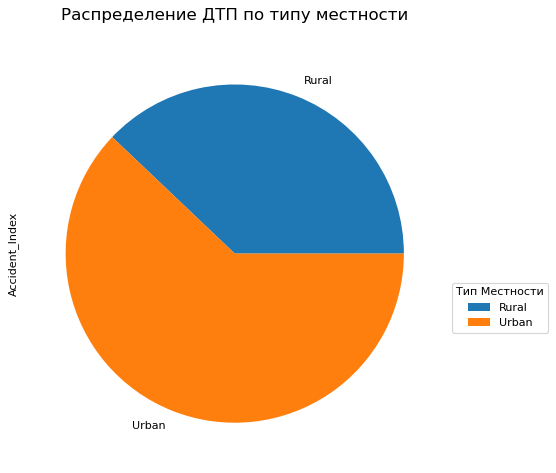

In [187]:
plt.figure(figsize=(9,7), dpi= 80)
df.groupby('Urban_or_Rural_Area')['Accident_Index'].count().plot(kind = 'pie')
plt.title('Распределение ДТП по типу местности', pad = 20, fontsize = 15)
plt.legend(loc=3,bbox_to_anchor=(1, 0.3), title= 'Тип Местности')
plt.show() 

Мы взяли параметр с уникальными значениями для каждого ДТП (Accident_Index) и посмотрели для него распределние на городскую и сельскую местность. Подавляющее большинство аварий просиходит в городе.

## Catplot

<Figure size 720x560 with 0 Axes>

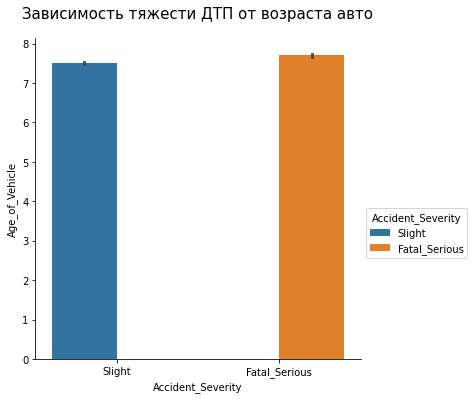

In [8]:
plt.figure(figsize=(9,7), dpi= 80)
sns.catplot(x='Accident_Severity', y='Age_of_Vehicle', data=df, kind='bar', hue = 'Accident_Severity')
plt.title('Зависимость тяжести ДТП от возраста авто', pad = 20, fontsize = 15)
plt.legend(loc=3,bbox_to_anchor=(1, 0.3), title= 'Accident_Severity')
plt.show() 

## FacetGrit

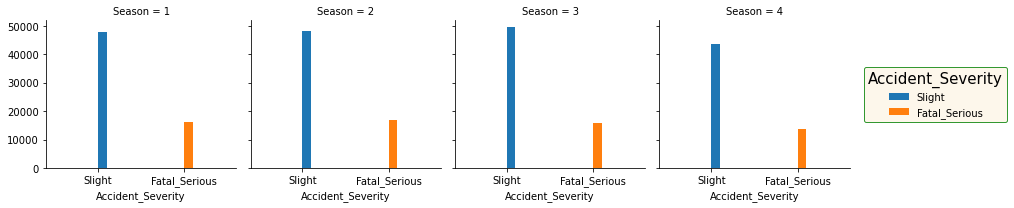

In [44]:
# Посмотрим на корреляцию времени года и тяжести травм в ДТП (1-зима, 2-весна, 3-лето, 4-осень)
g = sns.FacetGrid(df, col="Season", hue = 'Accident_Severity')
g.map(plt.hist, "Accident_Severity")
plt.legend(facecolor = 'oldlace', 
           edgecolor = 'green', 
           loc='center left', 
           bbox_to_anchor=(1.05, 0.5),
           title='Accident_Severity', 
           title_fontsize = '15')

## Stripplot

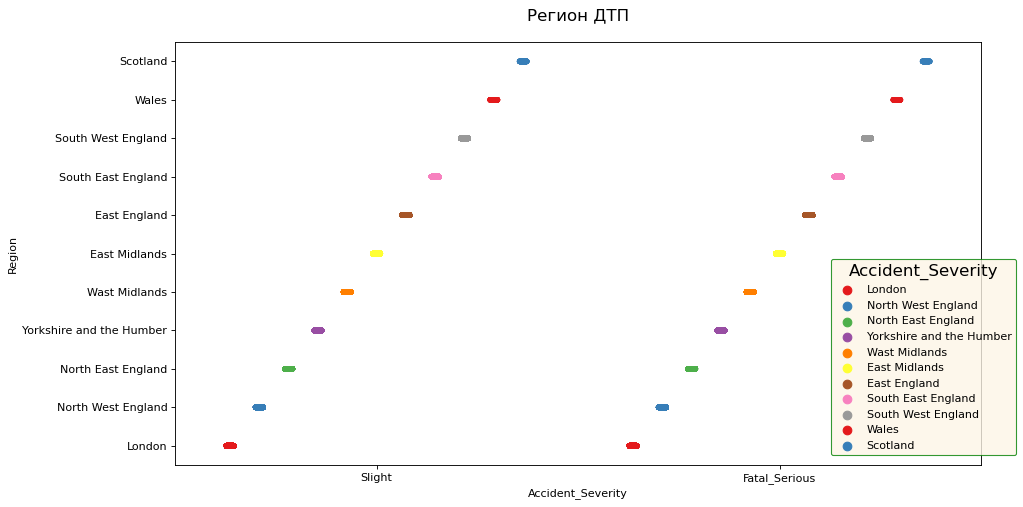

In [17]:
# Такой вид диаграммы рассеяния удобен для небольших наборов данных, но если наблюдений очень много. 
# В нашем случае результат не показателен для анализа.
plt.figure(figsize=(13,7), dpi= 80)
sns.stripplot(
    x="Accident_Severity",
    y="Region",
    data=df,
    jitter=True,
    hue='Region',
    palette='Set1',
    dodge=True)
plt.title('Регион ДТП', pad = 20, fontsize = 15)
plt.legend(facecolor = 'oldlace', 
           edgecolor = 'green', 
           loc='best', 
           bbox_to_anchor=(1.05, 0.5),
           title='Accident_Severity', 
           title_fontsize = '15')

## Swarmplot

In [ ]:
# Swarmplot представляет собой ровно то же самое, что и stripplot, 
# с той лишь разницей, что точки не накладываются друг на друга.
plt.figure(figsize=(13,7), dpi= 80)
sns.swarmplot(x=df["Day_of_Week"])
plt.title('День недели', pad = 20, fontsize = 15)

In [ ]:
sns.swarmplot(x="Day_of_Week",
                  y="Accident_Index",
                  hue="Urban_or_Rural_Area",
                  data=df)

## Выводы
На оснавании реализованной визуализации, мы можем сделать выводы:
   + Большая часть ДТП происходит в городской местности (что объясняется превалирующим городским населением)
   + Сколько-нибудь значимым признаком для определния тяжести травм в ДТП, является скоростной режим, установленный на данном участке дороге. 
Прочих значимых зависимостей выявлено не было. Возможно потому, что выборка не очень удачная - в ней нет самых важных факторов, влияющих на тяжесть травм (были ли пострадавшие пристегнуты ремнем безопасности, был ли водитель пьян, какова была скорость автомобиля (не скоростной режим на дороге, а фактическая скорость). 